## Figure out path attributes

In [1]:
from tqdm import tqdm
import pickle as pkl

import osmnx as ox

import matplotlib.pyplot as plt

In [6]:
with open("./data/drive/uw/uw_networkx_graph.pkl", "rb") as fin:
    G = pkl.load(fin)

In [7]:
def plot_base_network(G, **kwargs):
    fig, ax = ox.plot_graph(
        G, figsize=(8, 8),
        bgcolor="#fff", edge_color="#000", node_color="#000",
        show=False, close=True,
        node_size=1, edge_linewidth=0.2,
        **kwargs
    )
    return fig, ax

In [8]:
street_counts = [node[1] for node in tqdm(list(G.nodes("street_count")))]

100%|██████████| 13486/13486 [00:00<00:00, 3603056.48it/s]


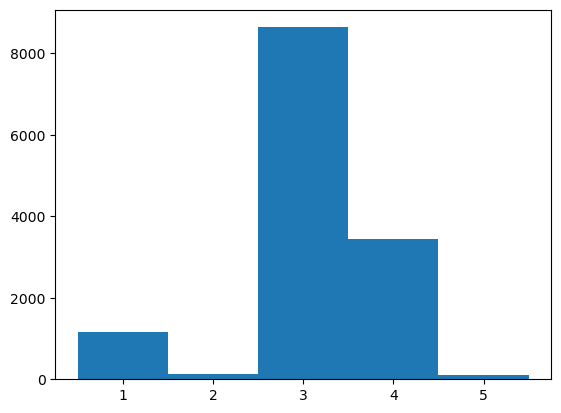

In [9]:
plt.hist(street_counts, bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5]);

In [13]:
nodes, edges = ox.graph_to_gdfs(G)
edges.sample(n=5)

,,,osmid,oneway,lanes,ref,highway,maxspeed,reversed,length,geometry,bridge,name,tunnel,junction,width,access
u,v,key,,,,,,,,,,,,,,,
9061271433,9061264128,0,158781373,False,2,NaN,residential,20 mph,True,196.865,"LINESTRING (-122.39282 47.67165, -122.39277 47...",NaN,Northwest 59th Street,NaN,NaN,NaN,NaN
9165447402,9165447403,0,992001208,True,1,NaN,residential,20 mph,False,7.141,"LINESTRING (-122.28410 47.63102, -122.28411 47...",NaN,NaN,NaN,roundabout,NaN,NaN
9072038841,9072038844,0,980725530,True,1,NaN,residential,20 mph,False,6.860,"LINESTRING (-122.33381 47.65313, -122.33381 47...",NaN,NaN,NaN,roundabout,NaN,NaN
53146177,53146176,0,6397924,False,2,NaN,residential,20 mph,True,94.260,"LINESTRING (-122.35440 47.63657, -122.35440 47...",NaN,Warren Avenue North,NaN,NaN,NaN,NaN
53072007,53085832,0,6396048,False,2,NaN,residential,20 mph,False,201.599,"LINESTRING (-122.40576 47.65046, -122.40576 47...",NaN,38th Avenue West,NaN,NaN,NaN,NaN


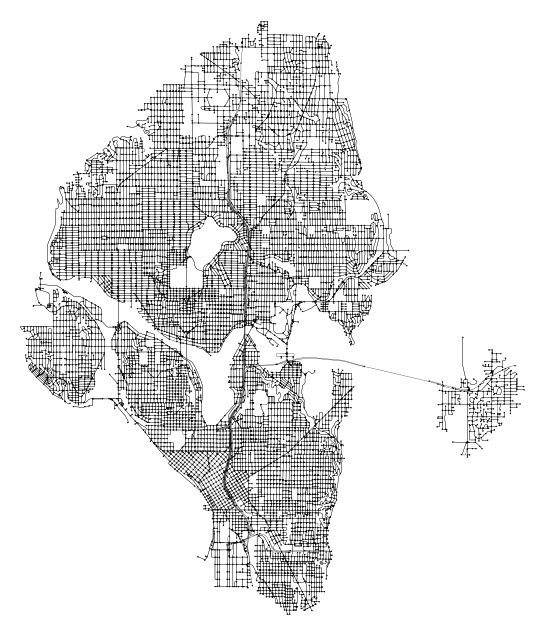

In [15]:
fig, ax = plot_base_network(G)
fig